# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/Data/Country-data.csv", sep = ",")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)



In [8]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [9]:
kmeans = KMeans(n_clusters= 5
                , random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [10]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

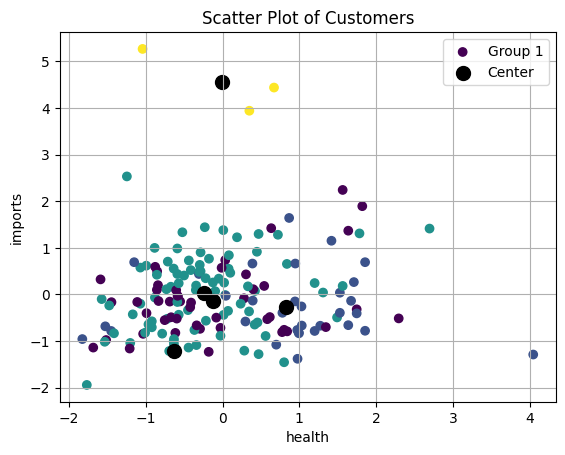

In [11]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 2
x2_index = 3


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

In [12]:
WCSSs = []
Ks = range(1, 15)
for k in Ks:
  kmeans = KMeans(n_clusters = k , n_init= 30 , init = "random")
  kmeans.fit(X_scaled)
  WCSSs.append(kmeans.inertia_)


In [13]:
#Get Inertia Method 2
#WCSSs = [KMeans(n_clusters = k , n_init= 30, init = "random").fit(X_scaled).inertia_ for k in range (1:15)]

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

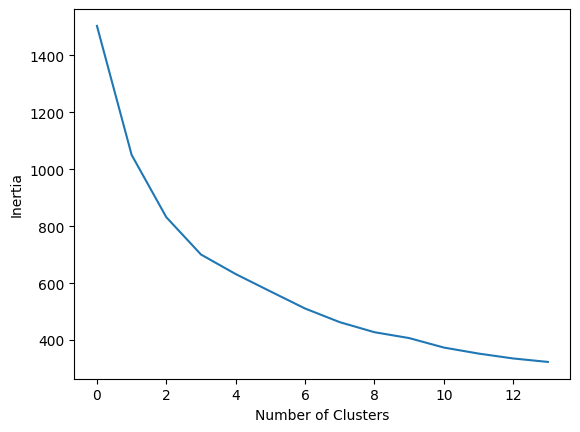

In [14]:
plt.plot(WCSSs)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [15]:
#split countries to developing countries and developed countries
k = 2

kmeans = KMeans(n_clusters=k, n_init= 30, init = "random").fit(X_scaled)

# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [16]:
preds = pd.DataFrame(kmeans.predict(X_scaled))

In [17]:
output = pd.concat([preds, X, names],axis = 1)

In [18]:
print("culster 1")
output[output[0] == 0]["country"]

culster 1


1                  Albania
2                  Algeria
4      Antigua and Barbuda
5                Argentina
6                  Armenia
              ...         
158         United Kingdom
159          United States
160                Uruguay
163              Venezuela
164                Vietnam
Name: country, Length: 99, dtype: object

In [19]:
print("culster 2")
output[output[0] == 1]["country"]

culster 2


0      Afghanistan
3           Angola
12      Bangladesh
17           Benin
19         Bolivia
          ...     
155         Uganda
161     Uzbekistan
162        Vanuatu
165          Yemen
166         Zambia
Name: country, Length: 68, dtype: object

In [20]:
### observation

From the result, we can observe that the countries in cluster 1 are predominantly developing countries, while the countries in cluster 2 are mainly developed countries. The fact that the clustering separates the countries into two distinct groups based on their socio-economic characteristics is not surprising. However, the fact that the majority of the countries in Cluster 1 are located in Africa, Asia, and the Pacific region, while the majority of countries in Cluster 2 are located in Europe, North America, South America, and Asia, suggests that there may be regional patterns in economic development that are not captured by the clustering algorithm.

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [21]:
Q6DF = pd.concat([preds, X], axis = 1)

In [22]:
Q6DF.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798
1,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294


In [23]:
Q6DF.groupby(0).std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127
1,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189


# Q7.) Write an observation about the descriptive statistics.

Overall, the descriptive statistics confirm the observations made from the clustering result, that Cluster 2 consists of more economically developed countries with higher income, life expectancy, and lower child mortality rates. Meanwhile, Cluster 1 consists of less economically developed countries with lower income, life expectancy, and higher child mortality rates. 